In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from fractions import Fraction
import pickle
import os


In [129]:
from matplotlib import style
style.use('dark_background')

In [130]:
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')
mach = Symbol('M')
E51 = Symbol('E_51')
Rk = Symbol('R_k')


## M33 results from model

In [131]:
#M33
# radius
arcmin_r = np.array([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,76,78,80,82,84,86,88,90,92,94,96])

# sigma_los
kms_sigma = np.array([0.7, 9.5, 9.3, 9.6, 0.0, 0.1, 9.1, 8.2, 8.0, 8.4, 7.9, 8.0, 7.6, 7.6, 8.0, 8.9, 9.8, 0.2, 0.3, 0.5, 9.5, 8.8, 9.1, 9.0, 8.5, 8.2, 8.3, 7.6, 7.7, 6.8, 7.4, 7.5, 6.7, 6.6, 6.4, 8.0, 8.2, 6.5, 6.5, 7.4, 6.5, 5.6, 6.1, 5.7, 5.7, 5.6, 6.4, 7.5])

# Sigma_HI
#kms_SigHI = np.array([7.89, 7.73, 8.26, 8.52, 8.23, 7.66, 8.00, 8.61, 8.14, 8.19, 7.61, 7.57, 7.54, 6.50, 4.99, 3.50, 2.51, 1.75, 1.34, 1.00, 0.75, 0.67, 0.56, 0.63, 0.49, 0.36, 0.23, 0.18, 0.12, 0.08, 0.04, 0.03, 0.03, 0.00, 0.03, 0.07, 0.03, 0.04, 0.04, 0.04, 0.08, 0.09, nan, nan, 0.09, nan, nan, nan])

In [132]:
#converted data
mpc_gal_dist = 0.78 #from Beck et al 
fac = mpc_gal_dist*np.pi/(180*60)
mpc_radius = fac*arcmin_r
mpc = 1
kpc = 1e+3*mpc
kpcm = 3.086e+21
pcm = kpcm/1e+3
Msun = 1.989e+33
kpc_radius = kpc*mpc_radius
kms_dat_v = np.sqrt(3)*kms_sigma


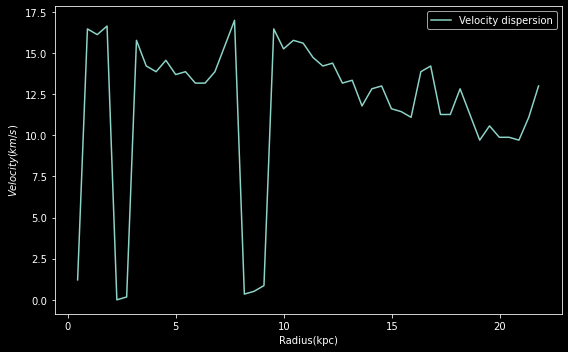

In [133]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8, 5), tight_layout=True)
ax.plot(kpc_radius, kms_dat_v, label = 'Velocity dispersion')
ax.set_xlabel('Radius(kpc)')
ax.set_ylabel('$Velocity(km/s)$')
ax.legend()
# ax.grid(b=True, which='major', color=[.6, .6, .6], linestyle='-')
# ax.grid(b=False, which='minor', color=[.6, .6, .6], linestyle=':')

In [134]:
#data from Chamandy et al (2016)
kpc_dat_r = np.array([2, 4])
dat_omega = np.array([40.7, 24.9])*1e+5/kpcm
dat_q = np.array([0.62, 0.84])
dat_sigma1 = np.array([11.3, 9.43])
dat_sigma2 = np.array([1.90, 1.28 ])
dat_sigma = (dat_sigma1 + dat_sigma2)*Msun/(pcm)**2
dat_sigmasfr = np.array([9.64, 3.99])*Msun/((10**9*365*24*60*60)*(pcm)**2)


In [135]:
kms = 1e+5
cs = (gamma*boltz*T/(mu*mh))**Rational(1/2)
cms_cs = cs.evalf(subs={gamma: 1.5, boltz: 1.38e-16, T:1e+4, mu:14/11, mh:1.67e-24})
print('Value of cs is {} and the max value of u is {}'.format(cms_cs,(kms_dat_v*kms).max()))
let = 'a'
if np.sqrt(2)*cms_cs < (kms_dat_v*kms).max(): 
    print('$M>>\sqrt(2)$')
    let = 'b'
else : 
    print('$M<<\sqrt(2)$')


Value of cs is 986868.443212531 and the max value of u is 1697409.7914174998
$M>>\sqrt(2)$


In [136]:
# quantities = [h, l, u, tau, biso, bani, Bbar, tanpb ]
script_dir = os.getcwd()  # <-- absolute dir the script is in
model_no = 3
#let = 'b'
a = [(gamma, 1.5), (boltz, 1.3807e-16), (mh, 1.67e-24), (mu, 14/11), (mach, 1), (G, 6.67e-8),
         (cl, 3/4), (xio, 0.4), (calpha, 1), (Rk, 0.3), (mstar, 0.85*Msun), (delta, 8e-3), (E51, 1),
         (sigmatot, 10*Msun/(pcm)**2), (sigma, dat_sigma.mean()),
             (sigmasfr, dat_sigma.mean()), (omega, dat_omega.mean()), (q, dat_q.mean()), (T, 1e+4)]
def model(let, model_no, a):
    model_name = "\model"+str(model_no)+let+".txt"
    rel_path = "model_scripts" + model_name
    abs_file_path = os.path.join(script_dir, rel_path)
    with open(abs_file_path, "rb") as inf:
        quantities = pickle.load(inf)
    if quantities[3].subs(a) < simplify(quantities[1].subs(a)/quantities[2].subs(a)):
        return quantities, let
    else:
        
        if let =='a':
            let = 'c'
            print('$tau^e>tau^r$. Therefore model changed to '+str(model_no) +let)
            return model(let, model_no, a)
        elif let =='b':
            let = 'd'
            print('$tau^e>tau^r$. Therefore model changed to '+str(model_no) +let)
            return model(let, model_no, a) 
        

quantities, let = model(let, model_no, a)


$tau^e>tau^r$. Therefore model changed to 3d


In [137]:
# quantities = [h, l, u, tau, biso, bani, Bbar, tanpb ]
vel = quantities[2]
vel

1.42710957642626e+43*pi**(26/103)*(E_51**(64/51)*Sigma_SFR*T*\delta*gamma*k_B/(m_**m_H*mu*((E_51**(64/51)*Sigma_SFR*T*\delta*gamma*k_B/(m_**m_H*mu*(\Sigma/m_H)**(76/51)*(T*gamma*k_B/(m_H*mu))**(2/3)))**(2/3)/(G*Sigma_tot))**(153/103)*(\Sigma/(m_H*((E_51**(64/51)*Sigma_SFR*\delta*(T*gamma*k_B/(m_H*mu))**(1/3)/(m_**(\Sigma/m_H)**(76/51)))**(2/3)/(G*Sigma_tot))**(153/103)))**(76/51)*(T*gamma*k_B/(m_H*mu))**(2/3)))**(1/3)

In [138]:

const = [(gamma, 1.5), (boltz, 1.3807e-16), (mh, 1.67e-24), (mu, 14/11), (mach, 1), (G, 6.67e-8),
         (cl, 3/4), (xio, 0.4), (calpha, 1), (Rk, 0.3), (mstar, 0.85*Msun), (delta, 8e-3), (E51, 1)]
variables = [(sigmatot, 10*Msun/(pcm)**2), (sigma, 1),
             (sigmasfr, 1), (omega, 1), (q, 1), (T, 1e+4)]

# plotting the scaling relations
observ = [sigma, sigmasfr, q, omega]

for obs in observ:
    variables.remove((obs, 1))
final = const + variables
z = vel.subs(final)
z.simplify(force=True)


3090416029213.4*pi**(26/103)*(Sigma_SFR/((Sigma_SFR/\Sigma**(76/51))**(102/103)*(\Sigma/(Sigma_SFR/\Sigma**(76/51))**(102/103))**(76/51)))**(1/3)

In [139]:
final_vel = []
for i in range(1,5,2):
    idx = np.where((kpc_radius>i)*(kpc_radius<i+2))
    final_vel.append(np.take(kms_dat_v,idx).mean())
final_vel = np.array(final_vel)

In [140]:
# from scipy.interpolate import interp1d
# fn = interp1d(kpc_radius, kms_dat_v ,kind = 'slinear', bounds_error= False, fill_value='extrapolate')

In [141]:
scalreldata = []
for sig, sigsfr in zip(dat_sigma, dat_sigmasfr):
    scalreldata.append(z.evalf(subs={sigma: sig, sigmasfr: sigsfr}))
scalreldata = np.array(np.float64(scalreldata))/kms
scalreldata


array([0.99970365, 0.75364276])

In [142]:
final_vel

array([ 8.22724134, 14.41066272])

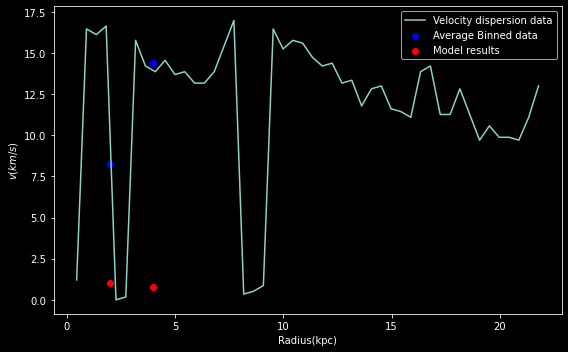

In [143]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8, 5), tight_layout=True)
ax.plot(kpc_radius, kms_dat_v, label = 'Velocity dispersion data')
ax.scatter(kpc_dat_r, final_vel, c = 'b', label = 'Average Binned data')
ax.scatter(kpc_dat_r, scalreldata,c = 'r', label = 'Model results')
ax.set_xlabel('Radius(kpc)')
ax.set_ylabel('$v(km/s)$')
ax.legend()